# ___Imports___

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, accuracy_score, recall_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline


# ___Load Data___

In [154]:
# load data for nasa
data = pd.read_csv('ALL_DATA.csv')
print(data.columns)


print(data.head())
print(np.shape(data))


Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')
      id        class      mass  fall    year       lat       long   Elevation
0    1.0           L5      21.0  Fell  1880.0  50.77500    6.08333  333.548386
1    2.0           H6     720.0  Fell  1951.0  56.18333   10.23333  333.548386
2    6.0          EH4  107000.0  Fell  1952.0  54.21667 -113.00000  333.548386
3   10.0  Acapulcoite    1914.0  Fell  1976.0  16.88333  -99.90000  333.548386
4  370.0           L6     780.0  Fell  1902.0 -33.16667  -64.95000  333.548386
(88705, 8)


# ___Scaling (10%)___

In [123]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
# all_data['year'].fillna(0).astype(int)
# all_data['mass'].fillna(0).astype(int)


data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())


Original Data Stats: 

                 id          mass          year           lat          long  \
count  88705.000000  8.870500e+04  88705.000000  88705.000000  88705.000000   
mean   37088.348053  1.327808e+04   1999.326928      2.815932     38.871848   
std    23580.335315  4.121868e+05     21.440582     50.503054     70.303823   
min        1.000000  0.000000e+00    301.000000    -87.366670   -174.833333   
25%    16281.000000  3.000000e+01   1998.000000    -38.630000      8.192500   
50%    34337.000000  1.200000e+04   2002.000000     23.000000     26.000000   
75%    56576.000000  1.327808e+04   2008.000000     45.968889     58.407850   
max    80694.000000  6.000000e+07   2501.000000     82.569167    354.473330   

          Elevation  
count  88705.000000  
mean     333.548386  
std      375.385323  
min      -11.000000  
25%      100.000000  
50%      333.548386  
75%      333.548386  
max     9999.000000  

--------

New Sample Data Stats: 

                 id          ma

# ___Target and Feature Variables___

In [155]:
all_data = pd.DataFrame(data=data)
print(all_data)

# target variable
target = data.year
# features
features = data.drop(['year'], axis=1)


# print(data.head())
features.columns

            id        class           mass  fall    year        lat  \
0          1.0           L5      21.000000  Fell  1880.0  50.775000   
1          2.0           H6     720.000000  Fell  1951.0  56.183330   
2          6.0          EH4  107000.000000  Fell  1952.0  54.216670   
3         10.0  Acapulcoite    1914.000000  Fell  1976.0  16.883330   
4        370.0           L6     780.000000  Fell  1902.0 -33.166670   
...        ...          ...            ...   ...     ...        ...   
88700  75686.0          NaN   13278.078549   NaN  2005.0 -38.000000   
88701  75687.0          NaN   13278.078549   NaN  2005.0 -38.000000   
88702  75691.0          NaN   13278.078549   NaN  2005.0 -36.816110   
88703  75692.0          NaN   13278.078549   NaN  2005.0 -36.816110   
88704  78769.0          NaN   13278.078549   NaN  2005.0  53.033333   

             long   Elevation  
0        6.083330  333.548386  
1       10.233330  333.548386  
2     -113.000000  333.548386  
3      -99.900000  

Index(['id', 'class', 'mass', 'fall', 'lat', 'long', 'Elevation'], dtype='object')

# ___One Hot Encoding___

In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# ### Categorical data to be converted to numeric data
# class_data = list(all_data['class'])
# fall_data = list(all_data['fall'])

class_data = list(features['class'])
fall_data = list(features['fall'])


### integer mapping using LabelEncoder
le = LabelEncoder()
class_encoded = le.fit_transform(class_data)
fall_encoded = le.fit_transform(fall_data)
class_encoded = class_encoded.reshape(len(class_encoded), 1)
fall_encoded = fall_encoded.reshape(len(fall_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_class = onehot_encoder.fit_transform(class_encoded)
onehot_encoded_fall = onehot_encoder.fit_transform(fall_encoded)

# print(onehot_encoded_class)
# all_data['class'] = onehot_encoded_class
# print(all_data['class'])

# print('\n\n\n')
# print(onehot_encoded_fall)
# all_data['fall'] = onehot_encoded_fall
# print(all_data['fall'])

print(onehot_encoded_class)
features['class'] = onehot_encoded_class
print(features['class'])

print('\n\n\n')
print(onehot_encoded_fall)
features['fall'] = onehot_encoded_fall
print(features['fall'])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
88700    0.0
88701    0.0
88702    0.0
88703    0.0
88704    0.0
Name: class, Length: 88705, dtype: float64




[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
88700    0.0
88701    0.0
88702    0.0
88703    0.0
88704    0.0
Name: fall, Length: 88705, dtype: float64


In [157]:
# print(all_data.head)
print(features.head)

<bound method NDFrame.head of             id  class           mass  fall        lat        long   Elevation
0          1.0    0.0      21.000000   1.0  50.775000    6.083330  333.548386
1          2.0    0.0     720.000000   1.0  56.183330   10.233330  333.548386
2          6.0    0.0  107000.000000   1.0  54.216670 -113.000000  333.548386
3         10.0    1.0    1914.000000   1.0  16.883330  -99.900000  333.548386
4        370.0    0.0     780.000000   1.0 -33.166670  -64.950000  333.548386
...        ...    ...            ...   ...        ...         ...         ...
88700  75686.0    0.0   13278.078549   0.0 -38.000000  145.000000  100.000000
88701  75687.0    0.0   13278.078549   0.0 -38.000000  145.000000  100.000000
88702  75691.0    0.0   13278.078549   0.0 -36.816110  144.680991  233.000000
88703  75692.0    0.0   13278.078549   0.0 -36.816110  144.680991  233.000000
88704  78769.0    0.0   13278.078549   0.0  53.033333   20.716667  150.000000

[88705 rows x 7 columns]>


# ___Bar Plot of year counts___

<BarContainer object of 276 artists>

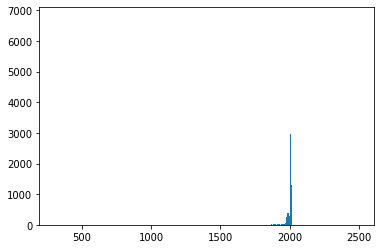

In [158]:
# count = all_data.year.value_counts()
# plt.bar(count.keys(), count.values)

count = target.value_counts()
plt.bar(count.keys(), count.values)

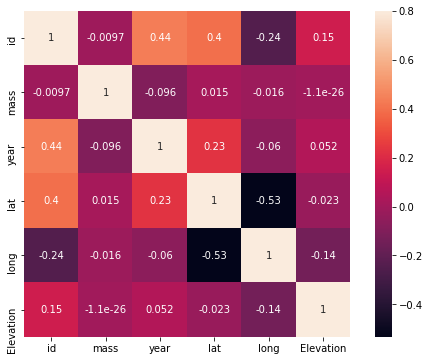

In [161]:
# heat map of correlation of features
correlation_matrix = all_data.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()

# # heat map of correlation of features
# correlation_matrix = features.corr()
# fig = plt.figure(figsize=(9,6))
# sns.heatmap(correlation_matrix,vmax=0.8, square = True, annot=True)
# plt.show()

In [162]:
# #Correlation with output variable
# cor_target = abs(correlation_matrix['year'])
# print(cor_target)
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.2]
# relevant_features


#Correlation with output variable
cor_target = abs(correlation_matrix['year'])
print(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

id           0.436587
mass         0.096375
year         1.000000
lat          0.228977
long         0.059676
Elevation    0.051912
Name: year, dtype: float64


id      0.436587
year    1.000000
lat     0.228977
Name: year, dtype: float64

# ___Build Model___

In [130]:
def data_model(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(LinearRegression())
    model = pipeline.fit(X_train, y_train)
    
    return (X_test, y_test, model)

# ___Test Model___

In [163]:
# print("Value distribution of features: ")
# print(list(all_data.iloc[0]))

# min_max = MinMaxScaler()
# data_min_max = min_max.fit_transform(all_data)
# print('\n')
# print("Value distribution after min max: ")
# print(list(data_min_max[0]))

# std = StandardScaler()
# data_std = std.fit_transform(all_data)
# print('\n')
# print("Value distribution after std: ")
# print(list(data_std[0]))

print("Value distribution of features: ")
print(list(features.iloc[0]))

min_max = MinMaxScaler()
data_min_max = min_max.fit_transform(features)
print('\n')
print("Value distribution after min max: ")
print(list(data_min_max[0]))

std = StandardScaler()
data_std = std.fit_transform(features)
print('\n')
print("Value distribution after std: ")
print(list(data_std[0]))

Value distribution of features: 
[1.0, 0.0, 21.0, 1.0, 50.775, 6.08333, 333.54838634618517]


Value distribution after min max: 
[0.0, 0.0, 3.5e-07, 1.0, 0.8129048746259518, 0.3417993308340014, 0.03442041821640212]


Value distribution after std: 
[-1.5728172058230052, -0.024680562891811992, -0.032162975554411624, 8.895559827418387, 0.9496324358654531, -0.466385781116156, 0.0]


# ___Model Evaluation___

In [169]:
#Data Variable
# x = all_data[all_data.columns[0]]
x = features
print(x)
#Target Variable
# y = all_data[all_data.columns[1]]
y = target
print(y)

            id  class           mass  fall        lat        long   Elevation
0          1.0    0.0      21.000000   1.0  50.775000    6.083330  333.548386
1          2.0    0.0     720.000000   1.0  56.183330   10.233330  333.548386
2          6.0    0.0  107000.000000   1.0  54.216670 -113.000000  333.548386
3         10.0    1.0    1914.000000   1.0  16.883330  -99.900000  333.548386
4        370.0    0.0     780.000000   1.0 -33.166670  -64.950000  333.548386
...        ...    ...            ...   ...        ...         ...         ...
88700  75686.0    0.0   13278.078549   0.0 -38.000000  145.000000  100.000000
88701  75687.0    0.0   13278.078549   0.0 -38.000000  145.000000  100.000000
88702  75691.0    0.0   13278.078549   0.0 -36.816110  144.680991  233.000000
88703  75692.0    0.0   13278.078549   0.0 -36.816110  144.680991  233.000000
88704  78769.0    0.0   13278.078549   0.0  53.033333   20.716667  150.000000

[88705 rows x 7 columns]
0        1880.0
1        1951.0
2     

In [175]:
# print("Base:")
# X_test, y_test, model = data_model(all_data, y)
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))
# print("R Squared: {}".format(r2_score(y_test, prediction)))
# print('\n')


# print("MinMax:")
# X_test, y_test, model = data_model(data_min_max, y)
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))
# print("R Squared: {}".format(r2_score(y_test, prediction)))
# print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
# print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
# print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
# print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))
# print("Classification Report: {}".format(classification_report(y_test, prediction.round())))
# print('\n')



# print("Std:")
# X_test, y_test, model = data_model(data_std, y)
# prediction = model.predict(X_test)
# print("MSE: {}".format(mean_squared_error(y_test, prediction)))
# print("R Squared: {}".format(r2_score(y_test, prediction)))
# print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
# print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
# print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
# print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))
# print("Classification Report: {}".format(classification_report(y_test, prediction.round())))


print("Base:")
X_test, y_test, model = data_model(x, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
print('\n')


print("MinMax:")
X_test, y_test, model = data_model(data_min_max, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
# print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
# print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
# print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
# print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))
# print("Classification Report: {}".format(classification_report(y_test, prediction.round())))
print('\n')



print("Std:")
X_test, y_test, model = data_model(data_std, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
# print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
# print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
# print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
# print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))
# print("Classification Report: {}".format(classification_report(y_test, prediction.round())))


Base:
MSE: 290.9725534947962
R Squared: 0.40841979538517226


MinMax:
MSE: 290.9725534947822
R Squared: 0.4084197953852008


Std:
MSE: 290.9725534947825
R Squared: 0.4084197953852001
